# Fashion MNIST Data Science Challenge: Neural Networks and Deep Learning


## **Intuition**

### Our goal
Classify clothes 

![alt text](https://miro.medium.com/max/608/1*3QpK4Vhw0BpbjwijIYFkfQ.png)

# Labels

Each training and test example is assigned to one of the following labels:

<li>0 T-shirt/top </li>
<li>1 Trouser</li>
<li>2 Pullover </li>
<li>3 Dress </li>
<li>4 Coat </li>
<li>5 Sandal</li>
<li>6 Shirt </li>
<li>7 Sneaker </li>
<li>8 Bag </li>
<li>9 Ankle boot </li>
--------------------------

Each row is a separate image

Column 1 is the class label.
Remaining columns are pixel numbers (784 total).
Each value is the darkness of the pixel (1 to 255)

### Architecture

![](http://neuralnetworksanddeeplearning.com/images/tikz12.png)

### Artificial Neuron
Inputs are weighted, summed up, a bias is added and the result is transformed by a nonlinear activation function. 
![alt text](https://www.researchgate.net/publication/320270458/figure/fig1/AS:551197154254848@1508427050805/Mathematical-model-of-artificial-neuron.png)

### Activation function
Squashes the weighted inputs into $[0, 1]$ (i.e. bounds the outputs) and introduces non-linearity to the model, e.g.

**Sigmoid function**:
\begin{eqnarray} 
  \sigma(z) \equiv \frac{1}{1+e^{-z}}
  \end{eqnarray}
![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/1200px-Logistic-curve.svg.png)

### Forward pass
Outputs are calculated in a **feed-forward manner**: activated weighted sums are propagated through the network to the output layer.

![alt text](https://glassboxmedicine.files.wordpress.com/2019/01/slide2.jpg?w=616)

### Backward pass
Errors are calculated from the outputs and **backpropagated**: the network improves its predictions (it learns) by updating the weights and biases in each backward pass from the last to the first hidden layer.

#### Loss function
Or cost function; Compares actual with desired outputs of the network and therefore measures the predictive performance of the network. 
$\begin{eqnarray} C(w,b) \equiv
  \frac{1}{2n} \sum_x \| y(x) - a\|^2.
\end{eqnarray}$

#### Optimization
Improve the networks performance by minimizing the cost w.r.t. the network's parameters w and b: 
$\begin{equation}
\begin{aligned} \min_{w,b} C(w,b) 
\end{aligned}
\end{equation}$ <br>
Compute partial derivatives $\partial C / \partial w$ and $\partial C / \partial b$ to identify the slope of the cost function w.r.t. w and b and use **gradient descent** step downwards by updating the parameters:

![alt text](http://neuralnetworksanddeeplearning.com/images/valley_with_ball.png)
\begin{eqnarray}
  w_k & \rightarrow & w_k' = w_k-\eta \frac{\partial C}{\partial w_k} \\
  b_l & \rightarrow & b_l' = b_l-\eta \frac{\partial C}{\partial b_l} \\
\end{eqnarray}
\begin{align}
\eta = \text{learning rate or step size}
\end{align}


![alt text](https://datascience-enthusiast.com/figures/kiank_sgd.png)



#### Backpropagation
Gradient descent requires the computation of partial derivatives $\partial C / \partial w$ and $\partial C / \partial b$ of the cost function C with respect to any weight w or bias b in the network. By means of the **backpropagation algorithm** those derivatives are computed efficiently.
[Read more](http://neuralnetworksanddeeplearning.com/chap2.html)

## **Fashion Mnist Classification**
Let's build a baseline model

In [1]:
#basic packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import datetime
import tensorflow as tf
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

### Data Preparation

In [2]:
#1. Get the file
data_train = pd.read_csv('train.csv')
data_validate = pd.read_csv('test.csv')

In [3]:
#2.Explore train data
data_train.head(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,0,0,0,0,0,0,0,1,123,...,0,0,0,0,127,150,28,0,0,0
1,2,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,169,43,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,129,37,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,0,0,0,0,...,4,0,0,188,216,103,0,0,0,0
6,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,4,0,0,0,0,0,0,0,0,0,...,0,0,0,57,86,63,0,0,0,0
8,0,0,0,0,0,0,1,3,0,0,...,103,73,0,0,2,0,0,0,0,0
9,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data_validate

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,5,0,0,0,0,0,0,0,0,0
1,0,0,0,2,0,0,0,0,0,0,...,125,32,3,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,3,0,0,0,...,70,38,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,52,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,120,...,0,0,0,1,4,1,0,0,0,0
9997,0,0,0,0,0,2,4,3,0,0,...,2,0,0,0,145,237,76,0,0,0
9998,0,0,0,0,3,0,0,0,21,131,...,179,184,162,179,42,0,0,0,0,0


In [5]:
#explore test data
print(data_train.shape)
data_validate.shape

(60000, 785)


(10000, 784)

In [6]:
data_train = np.array(data_train, dtype = 'float32') # Damit Input Daten von Keras akzeptiert werden müssen wir sie in ein Array umwandeln 
data_validate = np.array(data_validate, dtype='float32') 

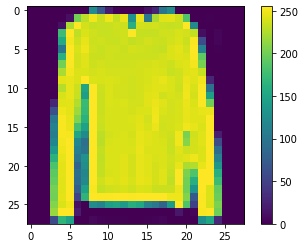

In [7]:
plt.figure()
plt.imshow(data_train[0,1:].reshape((28,28)))
plt.colorbar()
plt.grid(False)
plt.show()

In [8]:
#x_train = data_train[:,1:]/255 #pixel data from 0-1 TODO -0.5?
x_train = data_train[:,1:]  # Added normalization Layer
y_train = data_train[:,0] #label data

#data_submission = data_validate/255  # TODO -0.5?
data_submission = data_validate

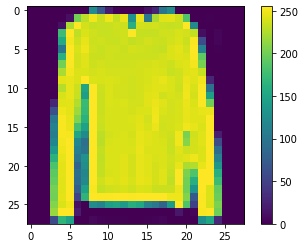

In [9]:
plt.figure()
plt.imshow(x_train[0].reshape((28,28)))
plt.colorbar()
plt.grid(False)
plt.show()

Es ist zu erkennen, dass die Pixel im Bereich zwischen 0 und 255 liegen. Für das Training auf dem Netzwerk müssen diese zwischen 0 und 1 liegen. 

Scale Grayscale ( [0,255] ) to [0,1]

In [10]:
x_train.shape

(60000, 784)

In [11]:
y_train.shape

(60000,)

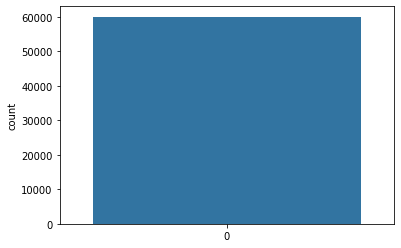

In [12]:
g = sns.countplot(data=y_train)

In [13]:
data_submission.shape

(10000, 784)

In [14]:
#reshape the array containing the images (28px x 28px and 1 channel)
image_rows = 28
image_cols = 28
image_shape = (image_rows,image_cols,1)# 1 da schwarz weiß, bei Farbbildern 3 (r,g,b)

x_train = x_train.reshape(x_train.shape[0],*image_shape)

data_submission = data_submission.reshape(data_submission.shape[0],*image_shape)

In [15]:
y_train.shape

(60000,)

Hint: Use ImageDataGenerator: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

In [16]:
x_train.shape

(60000, 28, 28, 1)

In [17]:
#split train data in train and validation set
x_train2,x_validate2,y_train2,y_validate2 = train_test_split(x_train,y_train,test_size = 0.2,shuffle=True,random_state = 12345)

In [18]:
print(x_train2.shape)
print(x_validate2.shape)
print(y_train2.shape)
print(y_validate2.shape)

(48000, 28, 28, 1)
(12000, 28, 28, 1)
(48000,)
(12000,)


*Hint: increase the size of the training set with data augmentation*
> https://www.tensorflow.org/tutorials/images/data_augmentation

### Modeling

#### Layers
* `Dense(dimensionality of output , activation function)`: regular fully connected NN layer
![alt text](http://neuralnetworksanddeeplearning.com/images/tikz41.png)
* `Conv2D(dimensionality of output, kernel size,... , activation function)`: 2D convolution layer for spatial convolution over images
![alt text](http://neuralnetworksanddeeplearning.com/images/tikz49.png)
![alt text](https://anhreynolds.com/img/cnn.png)
![alt text](https://i.ytimg.com/vi/rrOgPiqYu6s/hqdefault.jpg)
* `MaxPool2D(pool_size)`: Max pooling operation for spatial data.
![alt text](https://computersciencewiki.org/images/8/8a/MaxpoolSample2.png)
* `Flatten()`: Flattens the input. Does not affect the batch size.

![alt text](https://www.w3resource.com/w3r_images/numpy-manipulation-ndarray-flatten-function-image-1.png)

* `Dropout(rate, ..., seed)`: Dropout consists in randomly setting a fraction rate of input units to 0 at each update during training time, which helps prevent overfitting.

![alt text](http://neuralnetworksanddeeplearning.com/images/tikz31.png)

Import [Keras](https://www.tensorflow.org/api_docs/python/tf/keras), a high-level API for TensorFlow

In [19]:
# Display tensorflow devices to check for cuda
import tensorflow as tf
from tensorflow.python.client import device_lib
import keras
#print(device_lib.list_local_devices())

# Set GPU as device
#tf.config.experimental.set_memory_growth(tf.config.list_physical_devices('GPU')[0], True)
tf.config.set_soft_device_placement(False)
#tf.debugging.set_log_device_placement(True)
tf.device("/device:GPU:0")

In [20]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout,BatchNormalization,SpatialDropout2D,GaussianNoise,Input,Add,Activation,AveragePooling2D,ZeroPadding2D
from keras.optimizers import Adam
from keras.callbacks import TensorBoard# zur Visualisierung

# Creates layers for data preprocessing -> helps with generalisation
# TODO define seed globally
data_augmentation = tf.keras.Sequential([
        tf.keras.layers.experimental.preprocessing.Normalization(),
        #tf.keras.layers.experimental.preprocessing.RandomRotation(factor=0.25, fill_mode='reflect', interpolation='bilinear', seed=1234, fill_value=0.0),
        tf.keras.layers.experimental.preprocessing.RandomZoom(height_factor=0.2, width_factor=None, fill_mode='reflect', interpolation='bilinear', seed=1234, fill_value=0.0),
        tf.keras.layers.experimental.preprocessing.RandomContrast(factor=0.2, seed=1234),
        #tf.keras.layers.experimental.preprocessing.RandomTranslation(height_factor=0.2, width_factor=0.2, fill_mode='reflect', interpolation='bilinear', seed=1234, fill_value=0.0),
        tf.keras.layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical", seed=1234)
], name="data_augmentation")

model = tf.keras.Sequential([
        data_augmentation,
        Conv2D(kernel_size=3,filters=10,activation='relu',input_shape=(28,28,1)),
        Flatten(),
        #....,
        #....,
        #....,
        #....,
        Dense(64,activation = 'relu'),
        Dense(10,activation = 'softmax')  # 10 neurons for output, softmax best according to article TODO article here
    ], name="model")

# AlexNet
alex_net = tf.keras.Sequential([
        data_augmentation,
        Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same", input_shape=(28,28,1)),
        BatchNormalization(),
        MaxPooling2D(pool_size=(3,3), strides=(2,2)),
        Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
        BatchNormalization(),
        Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
        BatchNormalization(),
        Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
        BatchNormalization(),
        MaxPooling2D(pool_size=(3,3), strides=(2,2)),
        Flatten(),
        Dense(4096, activation='relu'),
        Dropout(0.5),
        Dense(4096, activation='relu'),
        Dropout(0.5),
        Dense(1000, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')  # 10 neurons for output, softmax best according to article TODO article here
    ], name="alex_net")

vgg_16 = tf.keras.Sequential([
        data_augmentation,
        Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same", input_shape=(28,28,1)),
        Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
        Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
        MaxPooling2D(pool_size=(2,2), strides=(2,2), padding="same"),
        #Dropout(0.2),
    
        Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
        Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
        Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
        MaxPooling2D(pool_size=(2,2), strides=(2,2), padding="same"),
        Dropout(0.2),
    
        Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
        Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
        Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
        MaxPooling2D(pool_size=(2,2), strides=(2,2), padding="same"),
        Dropout(0.2),
        
        # Not using this VGG Layer since the image size is 28x28 instead of 227 x 227 (TODO find way to make network deeper)
        #Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
        #Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
        #Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
        #BatchNormalization(),
        #MaxPooling2D(pool_size=(2,2), strides=(2,2), padding="same"),
        #Dropout(0.2),
    
        Flatten(),
        Dense(4096, activation='relu'),
        Dropout(0.5),
        Dense(4096, activation='relu'),
        Dropout(0.5),
        Dense(1000, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')  # 10 neurons for output, softmax best according to article TODO article here
    ], name="vgg_16")

# Use batch normalization for faster convergance -> bigger learning rate
vgg_16_batchnorm = tf.keras.Sequential([
        data_augmentation,
        Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same", input_shape=(28,28,1)),
        Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
        Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2,2), strides=(2,2), padding="same"),
        #Dropout(0.2),
    
        Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
        Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
        Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2,2), strides=(2,2), padding="same"),
        #Dropout(0.2),
    
        Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
        Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
        Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2,2), strides=(2,2), padding="same"),
        #Dropout(0.2),
        
        # Not using this VGG Layer since the image size is 28x28 instead of 227 x 227 (TODO find way to make network deeper)
        #Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
        #Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
        #Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
        #BatchNormalization(),
        #MaxPooling2D(pool_size=(2,2), strides=(2,2), padding="same"),
        #Dropout(0.2),
    
        Flatten(),
        Dense(4096, activation='relu'),
        Dropout(0.5),
        Dense(4096, activation='relu'),
        Dropout(0.5),
        Dense(1000, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')  # 10 neurons for output, softmax best according to article TODO article here
    ], name="vgg_16_batchnorm")
vgg_19 = tf.keras.Sequential([
        data_augmentation,
        Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same", input_shape=(28,28,1)),
        Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
        MaxPooling2D(pool_size=(2,2), strides=(2,2), padding="same"),
    
        Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
        Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
        MaxPooling2D(pool_size=(2,2), strides=(2,2), padding="same"),
    
        Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
        Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
        MaxPooling2D(pool_size=(2,2), strides=(2,2), padding="same"),
        
        # TODO smaller input dimensions (28 x 28 vs 227 x 227)?
        Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
        Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
        Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
        Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
        MaxPooling2D(pool_size=(2,2), strides=(2,2), padding="same"),
        
        Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
        Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
        Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
        Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
        MaxPooling2D(pool_size=(2,2), strides=(2,2), padding="same"),
    
        Flatten(),
        Dense(4096, activation='relu'),
        Dropout(0.5),
        Dense(4096, activation='relu'),
        Dropout(0.5),
        Dense(1000, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')  # 10 neurons for output, softmax best according to article TODO article here
    ], name="vgg_19")

min_vgg_16 = tf.keras.Sequential([
        data_augmentation,
        Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same", input_shape=(28,28,1)),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2,2), strides=(2,2), padding="same"),
        #Dropout(0.25),
    
        Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2,2), strides=(2,2), padding="same"),
        Dropout(0.25),
    
        Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
        BatchNormalization(),
        Dropout(0.25),
        
        # Not using this VGG Layer since the image size is 28x28 instead of 227 x 227 (TODO find way to make network deeper)
        Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
        #Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
        #Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2,2), strides=(2,2), padding="same"),
        GaussianNoise(0.1),
        Dropout(0.25),
    
        Flatten(),
        Dense(1024, activation='relu'),
        Dropout(0.5),
        Dense(200, activation='relu'),
        Dropout(0.5),
        Dense(1024, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')  # 10 neurons for output, softmax best according to article TODO article here
    ], name="min_vgg_16")

min_vgg_19 = tf.keras.Sequential([
        data_augmentation,
        Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same", input_shape=(28,28,1)),
        #MaxPooling2D(pool_size=(2,2), strides=(2,2), padding="same"),
        #Dropout(0.2),
    
        Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
        #MaxPooling2D(pool_size=(2,2), strides=(2,2), padding="same"),
        Dropout(0.2),
    
        Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
        MaxPooling2D(pool_size=(2,2), strides=(2,2), padding="same"),
        Dropout(0.2),
        
        Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
        #Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
        #Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
        MaxPooling2D(pool_size=(2,2), strides=(2,2), padding="same"),
        Dropout(0.2),
        
        # Not using this VGG Layer since the image size is 28x28 instead of 227 x 227 (TODO find way to make network deeper)
        Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
        #Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
        #Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
        MaxPooling2D(pool_size=(2,2), strides=(2,2), padding="same"),
        Dropout(0.2),
    
        Flatten(),
        Dense(1024, activation='relu'),
        Dropout(0.5),
        Dense(200, activation='relu'),
        Dropout(0.5),
        Dense(1024, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')  # 10 neurons for output, softmax best according to article TODO article here
    ], name="min_vgg_19")
    

In [21]:
# Create Resnet as in https://towardsdatascience.com/understand-and-implement-resnet-50-with-tensorflow-2-0-1190b9b52691
def res_identity(x, filters): 
  #renet block where dimension doesnot change.
  #The skip connection is just simple identity conncection
  #we will have 3 blocks and then input will be added

  x_skip = x # this will be used for addition with the residual block 
  f1, f2 = filters

  #first block 
  x = Conv2D(f1, kernel_size=(1, 1), strides=(1, 1), padding='valid', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
  x = BatchNormalization()(x)
  x = Activation(tf.keras.activations.relu)(x)

  #second block # bottleneck (but size kept same with padding)
  x = Conv2D(f1, kernel_size=(3, 3), strides=(1, 1), padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
  x = BatchNormalization()(x)
  x = Activation(tf.keras.activations.relu)(x)

  # third block activation used after adding the input
  x = Conv2D(f2, kernel_size=(1, 1), strides=(1, 1), padding='valid', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
  x = BatchNormalization()(x)
  # x = Activation(tf.keras.activations.relu)(x)

  # add the input 
  x = Add()([x, x_skip])
  x = Activation(tf.keras.activations.relu)(x)

  return x

def res_conv(x, s, filters):
  '''
  here the input size changes''' 
  x_skip = x
  f1, f2 = filters

  # first block
  x = Conv2D(f1, kernel_size=(1, 1), strides=(s, s), padding='valid', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
  # when s = 2 then it is like downsizing the feature map
  x = BatchNormalization()(x)
  x = Activation(tf.keras.activations.relu)(x)

  # second block
  x = Conv2D(f1, kernel_size=(3, 3), strides=(1, 1), padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
  x = BatchNormalization()(x)
  x = Activation(tf.keras.activations.relu)(x)

  #third block
  x = Conv2D(f2, kernel_size=(1, 1), strides=(1, 1), padding='valid', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
  x = BatchNormalization()(x)

  # shortcut 
  x_skip = Conv2D(f2, kernel_size=(1, 1), strides=(s, s), padding='valid', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x_skip)
  x_skip = BatchNormalization()(x_skip)

  # add 
  x = Add()([x, x_skip])
  x = Activation(tf.keras.activations.relu)(x)

  return x

def resnet50():

  input_im = Input(shape=(28, 28, 1))
  x = ZeroPadding2D(padding=(3, 3))(input_im)

  # 1st stage
  # here we perform maxpooling, see the figure above

  x = Conv2D(64, kernel_size=(7, 7), strides=(2, 2))(x)
  x = BatchNormalization()(x)
  x = Activation(tf.keras.activations.relu)(x)
  x = MaxPooling2D((3, 3), strides=(2, 2))(x)

  #2nd stage 
  # frm here on only conv block and identity block, no pooling

  x = res_conv(x, s=1, filters=(64, 256))
  x = res_identity(x, filters=(64, 256))
  x = res_identity(x, filters=(64, 256))

  # 3rd stage

  x = res_conv(x, s=2, filters=(128, 512))
  x = res_identity(x, filters=(128, 512))
  x = res_identity(x, filters=(128, 512))
  x = res_identity(x, filters=(128, 512))

  # 4th stage

  x = res_conv(x, s=2, filters=(256, 1024))
  x = res_identity(x, filters=(256, 1024))
  x = res_identity(x, filters=(256, 1024))
  x = res_identity(x, filters=(256, 1024))
  x = res_identity(x, filters=(256, 1024))
  x = res_identity(x, filters=(256, 1024))

  # 5th stage

  x = res_conv(x, s=2, filters=(512, 2048))
  x = res_identity(x, filters=(512, 2048))
  x = res_identity(x, filters=(512, 2048))

  # ends with average pooling and dense connection

  x = AveragePooling2D((2, 2), padding='same')(x)
    
  x = Flatten()(x)
  x = Dense(10, activation='softmax', kernel_initializer='he_normal')(x) #multi-class

  # define the model 

  res_model = tf.keras.Model(inputs=input_im, outputs=x, name='Resnet50')

  return res_model

res_net_50 = tf.keras.Sequential([
        data_augmentation,
        resnet50(),
    ], name="res_net_50")

In [22]:
def minresnet50():

  input_im = Input(shape=(28, 28, 1))
  x = ZeroPadding2D(padding=(3, 3))(input_im)

  # 1st stage
  # here we perform maxpooling, see the figure above

  x = Conv2D(64, kernel_size=(7, 7), strides=(2, 2))(x)
  x = BatchNormalization()(x)
  x = Activation(tf.keras.activations.relu)(x)
  x = MaxPooling2D((3, 3), strides=(2, 2))(x)

  #2nd stage 
  # frm here on only conv block and identity block, no pooling

  x = res_conv(x, s=1, filters=(64, 256))
  x = res_identity(x, filters=(64, 256))
  x = Dropout(0.25)(x)

  # 3rd stage

  x = res_conv(x, s=2, filters=(128, 512))
  x = res_identity(x, filters=(128, 512))
  x = Dropout(0.25)(x)

  # 4th stage

  x = res_conv(x, s=2, filters=(256, 1024))
  x = res_identity(x, filters=(256, 1024))
  x = res_identity(x, filters=(256, 1024))
  x = res_identity(x, filters=(256, 1024))
  x = Dropout(0.25)(x)

  # 5th stage

  x = res_conv(x, s=2, filters=(512, 2048))
  x = res_identity(x, filters=(512, 2048))
  x = res_identity(x, filters=(512, 2048))

  # ends with average pooling and dense connection

  x = AveragePooling2D((2, 2), padding='same')(x)
  x = Dropout(0.25)(x)
    
  x = Flatten()(x)
  x = Dense(10, activation='softmax', kernel_initializer='he_normal')(x) #multi-class

  # define the model 

  res_model = tf.keras.Model(inputs=input_im, outputs=x, name='MinResnet50')

  return res_model

min_res_net_50 = tf.keras.Sequential([
        data_augmentation,
        minresnet50(),
    ], name="min_res_net_50")

In [29]:
def res18_block(x, num_filter, stride = 2): 

  x_skip = x # this will be used for addition with the residual block 

  #first block 
  x = Conv2D(num_filter, kernel_size=(3, 3), strides=(stride, stride), padding='valid', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
  x = BatchNormalization()(x)
  x = Activation(tf.keras.activations.relu)(x)

  #second block # bottleneck (but size kept same with padding)
  x = Conv2D(num_filter, kernel_size=(3, 3), strides=(stride, stride), padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
  x = BatchNormalization()(x)
  x = Activation(tf.keras.activations.relu)(x)

  x_skip = Conv2D(num_filter, kernel_size=(1, 1), strides=(stride, stride), padding='valid', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x_skip)
  x_skip = BatchNormalization()(x_skip)

  # add the input 
  x = Add()([x, x_skip])
  x = Activation(tf.keras.activations.relu)(x)

  return x

def resnet18():

  input_im = Input(shape=(28, 28, 1))
  x = ZeroPadding2D(padding=(3, 3))(input_im)

  # 1st stage
  # here we perform maxpooling, see the figure above

  x = Conv2D(64, kernel_size=(7, 7), strides=(2, 2))(x)
  x = BatchNormalization()(x)
  x = Activation(tf.keras.activations.relu)(x)
  x = MaxPooling2D((3, 3), strides=(2, 2))(x)

  #2nd stage 
  # frm here on only conv block and identity block, no pooling

  x = res_conv(x, 2, (64, 64))
  x = res_conv(x, 2, (128, 128))
  x = res_conv(x, 2, (256, 256))
  x = res_conv(x, 2, (512, 512))

  # ends with average pooling and dense connection

  x = AveragePooling2D((2, 2), padding='same')(x)
    
  x = Flatten()(x)
  x = Dense(1000, activation='relu')(x)
  x = Dense(10, activation='softmax', kernel_initializer='he_normal')(x) #multi-class

  # define the model 

  res_model = tf.keras.Model(inputs=input_im, outputs=x, name='Resnet18')

  return res_model

res_net_18 = tf.keras.Sequential([
        data_augmentation,
        resnet18(),
    ], name="res_net_18")

In [30]:
training_network = "res_net_18"
batch_size = 64
learning_rate = 0.001

if training_network == "alex_net":
    model = alex_net
elif training_network == "min_vgg_16":
    model = min_vgg_16
    batch_size = 128
elif training_network == "min_vgg_19":
    model = min_vgg_19
    batch_size = 64
elif training_network == "vgg_16":
    model = vgg_16
    batch_size = 128
elif training_network == "vgg_16_batchnorm":
    model = vgg_16_batchnorm
    learning_rate = 0.005
elif training_network == "vgg_19":
    model = vgg_19
elif training_network == "res_net_50":
    model= res_net_50
elif training_network == "min_res_net_50":
    model= min_res_net_50
elif training_network == "res_net_18":
    model= res_net_18
else:
    training_network = "model"

In [ ]:
#model.summary()

*Hint: change the type, number and order of layers*
> https://www.tensorflow.org/api_docs/python/tf/keras/layers

*Hint: change the activation function*
> https://www.tensorflow.org/api_docs/python/tf/keras/activations

*Hint: prevent overfitting and speedup training by adding regularization*
> https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#strategies_to_prevent_overfitting

Choose an optimizer and loss function for training
Choose metric to evaluate performance

## Kompilieren des Modells
Bevor das Modell für das Training bereit ist, müssen einige weitere Einstellungen vorgenommen werden. 
Diese werden während des Kompilierungsschritts des Modells hinzugefügt:

Verlustfunktion - Hiermit wird gemessen, wie genau das Modell während des Trainings ist. Sie möchten diese Funktion minimieren, um das Modell in die richtige Richtung zu "steuern".

Optimierer - Auf diese Weise wird das Modell basierend auf den angezeigten Daten und seiner Verlustfunktion aktualisiert.

Metriken - Dient zum Überwachen der Trainings- und Testschritte. Im folgenden Beispiel wird die Genauigkeit verwendet , der Bruchteil der Bilder, die korrekt klassifiziert wurden.

In [31]:
model.compile(
              optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=True),
              #optimizer=tf.keras.optimizers.Nadam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

*Hint: change the loss function*
> https://www.tensorflow.org/api_docs/python/tf/keras/losses

*Hint: change the optimization method and its parameters*
> https://www.tensorflow.org/api_docs/python/tf/keras/optimizers

### Hyperparameter Tuning
For [optimizing hyperparameters](https://en.wikipedia.org/wiki/Hyperparameter_optimization) such as learning rate of SGD in an efficient and non-heuristic way, use a subset of your training data as validation set and perform Grid Search.

### Training

In [32]:
history = []

In [ ]:
total_epochs = 150
adam_epochs = 50
history.append(model.fit(
    x_train2,
    y_train2,
    epochs=adam_epochs, # use more epochs for alexnet
    #epochs=14,
    batch_size=batch_size,
    verbose=1,
    validation_data=(x_validate2,y_validate2),
    use_multiprocessing=True,
    workers=20,
    max_queue_size=50
    ))

Epoch 1/50
750/750 [==============================] - 63s 73ms/step - loss: 3.0071 - accuracy: 0.6661 - val_loss: 1.3694 - val_accuracy: 0.7878
Epoch 2/50
750/750 [==============================] - 56s 75ms/step - loss: 1.2569 - accuracy: 0.7757 - val_loss: 1.0219 - val_accuracy: 0.7797
Epoch 3/50
282/750 [==========>...................] - ETA: 32s - loss: 0.9414 - accuracy: 0.7968

In [ ]:
# Train with 2 optimizers
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, decay=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history.append(model.fit(
    x_train2,
    y_train2,
    epochs=total_epochs, # use more epochs for alexnet
    #epochs=14,
    batch_size=batch_size,
    verbose=1,
    validation_data=(x_validate2,y_validate2),
    use_multiprocessing=True,
    workers=20,
    max_queue_size=50,
    initial_epoch=adam_epochs + 1
    ))

In [ ]:
model.summary()

In [ ]:
score = model.evaluate(x_validate2,y_validate2,verbose=0)
print('Test Loss : {:.4f}'.format(score[0]))
print('Test Accuracy : {:.4f}'.format(score[1]))

In [ ]:
type(history)

In [ ]:
plt.figure(figsize=(20, 10))

train_list = []
val_list = []

for his in history:
    if his.history.get("loss") is None or his.history.get("val_loss") is None:
        continue
    train_list.extend(his.history['loss'])
    val_list.extend(his.history['val_loss'])

plt.plot(train_list, label='Loss')
plt.plot(val_list, label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

In [ ]:
plt.figure(figsize=(20, 10))

train_list = []
val_list = []

for his in history:
    if his.history.get("accuracy") is None or his.history.get("val_accuracy") is None:
        continue
    train_list.extend(his.history['accuracy'])
    val_list.extend(his.history['val_accuracy'])

plt.plot(train_list, label='Accuracy')
plt.plot(val_list, label='Validation Accuracy')
plt.legend()
plt.title('Training - Accuracy Function')

### Submission
Submit your final notebook as **fashion_mnist_teamX.ipynb** and your predictions of the test data as a **predictions_teamX.csv**.

In [ ]:
# Plot confusion matrix
import sklearn.metrics
val_pred = np.argmax(model.predict(x_validate2), axis = 1)

conf_matrix = pd.DataFrame(sklearn.metrics.confusion_matrix(y_validate2, val_pred), index=["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker","Bag", "Ankle boot"])
plt.figure(figsize = (10,7))
sns.heatmap(conf_matrix, annot=True)

In [ ]:
# predict results
results = model.predict(data_submission)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")
results

In [ ]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

val_labels = np.empty(len(data_submission))
missing = []

for index in range(len(val_labels)):
    found = False
    print(index)
    for inner_ind in range(len(train_images)):
        if np.array_equal(train_images[inner_ind], data_submission[index]):
            found = True
            val_labels[index] = train_labels[inner_ind]
            break
    if not found:
        for inner_ind in range(len(test_images)):
            if np.array_equal(test_images[inner_ind], data_submission[index]):
                found = True
                val_labels[index] = test_labels[inner_ind]
                break
    if not found:
        val_labels[index] = 99
        print(index)
        #raise ValueError(str(index))
print(missing)

pd.DataFrame(val_labels).to_csv('labels.csv', index=False)

In [ ]:
model.predict([data_submission[0]])

In [ ]:
# Visualise feature maps (from https://machinelearningmastery.com/how-to-visualize-filters-and-feature-maps-in-convolutional-neural-networks/)
for i in range(len(model.layers)):
    layer = model.layers[i]fashion_mnist
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue
    fm_model = tf.keras.Model(inputs=model.inputs, outputs=model.layers[i].output)
    print(data_submission[0].shape)
    feature_maps = fm_model.predict([data_submission[0]])
    # plot the output from each block
    square = 8
    for fmap in feature_maps:
        # plot all 64 maps in an 8x8 squares
        ix = 1
        for _ in range(square):
            for _ in range(square):
                # specify subplot and turn of axis
                ax = plt.subplot(square, square, ix)
                ax.set_xticks([])
                ax.set_yticks([])
                # plot filter channel in grayscale
                print(fmap.shape)
                plt.imshow(fmap[0, :, ix-1], cmap='gray')
                ix += 1
        # show the figure
        plt.show()

In [ ]:
# Save model to disk
from datetime import datetime
if True:
    model.save("trained_models/model_" + training_network + "_"+ datetime.now().strftime("%d%m%Y_%H%M%S"))

In [ ]:
data_results = pd.DataFrame(results)
data_results.head(10)

In [ ]:
data_results.to_csv('fashion_mnist_pred_team1.csv', index=False)#Bitte statt X eure Gruppennummer einfügen! 

## Ressources
Background:
  * Book: [Neural Networks and Deep Learning, Michael Nielsen](http://neuralnetworksanddeeplearning.com) 
  * Lecture: [CS231n, Stanford University](http://cs231n.stanford.edu/)

Implementation:
  * [TensorFlow tutorials](https://www.tensorflow.org/tutorials)
  * [Keras Docs](https://www.tensorflow.org/api_docs/python/tf/keras)

## Image Sources
* http://neuralnetworksanddeeplearning.com/images/
* https://www.researchgate.net/publication/320270458/figure/fig1/AS:551197154254848@1508427050805/Mathematical-model-of-artificial-neuron.png
* https://www.w3resource.com/w3r_images/numpy-manipulation-ndarray-flatten-function-image-1.png
* https://computersciencewiki.org/images/8/8a/MaxpoolSample2.png
* https://glassboxmedicine.files.wordpress.com/2019/01/slide2.jpg?w=616
* http://neuralnetworksanddeeplearning.com/images/valley_with_ball.png
* https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/1200px-Logistic-curve.svg.png